<h2>Case 2. Diabetic Retinopathy Analysis (binary)</h2>
<h3>Author: Amir Ingher and Joona Ikonen</h3>
<br>
<p>3.3.2019</p>
<br>
<p>Code that was used in this case  <a href="https://github.com/sakluk/cognitive-systems-for-health-technology/blob/master/Week%204.%20Case%202%20-%20First%20trial.ipynb">(link)</a></p>
<br>
<p>Organization: Metropolia University of Applied Sciences</p>

In [232]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras import models
from keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
import os
import glob, cv2


In [233]:
img_size=150#150

<h3>Data</h3>
<br>
<p>Lets start by looking our data so that we get the general idea what we are going to give as a input to our (conv2) network</p>

Pixel (min, max): 0 238


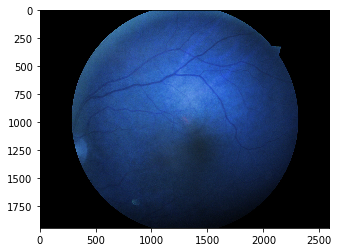

In [264]:
f = './dataset2/test/nosymptoms/159_left.jpeg'
a = cv2.imread(f)
print('Pixel (min, max):', np.min(a), np.max(a))
plt.imshow(a)
plt.show()

Pixel (min, max): 0 255


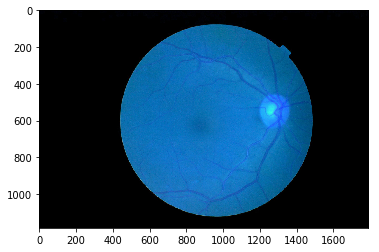

In [263]:
f = './dataset2/test/symptoms/1050_right.jpeg'
a = cv2.imread(f)
print('Pixel (min, max):', np.min(a), np.max(a))
plt.imshow(a)
plt.show()

<h3>Create our neural network model</h3>
<br>
<p>Now that we have checked our data we can start to design our model. </p>

In [294]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 9248)              0         
__________

In [295]:
from keras import optimizers


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adadelta(),
              metrics=['acc'])

In [296]:

from keras.preprocessing.image import ImageDataGenerator

train_dir = "./dataset2/train"
validation_dir = "./dataset2/validation"

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    train_dir,
    # All images will be resized to 150x150
    target_size=(img_size, img_size),

    # We read images in batches
    batch_size=15,
    
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=15,
        class_mode='binary')

Found 1031 images belonging to 2 classes.
Found 516 images belonging to 2 classes.


In [297]:
# Testing that train generator works
i = 0
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    i = i + 1
    if i > 5:
        break

data batch shape: (15, 150, 150, 3)
labels batch shape: (15,)
data batch shape: (15, 150, 150, 3)
labels batch shape: (15,)
data batch shape: (15, 150, 150, 3)
labels batch shape: (15,)
data batch shape: (15, 150, 150, 3)
labels batch shape: (15,)
data batch shape: (15, 150, 150, 3)
labels batch shape: (15,)
data batch shape: (15, 150, 150, 3)
labels batch shape: (15,)


In [298]:
# Check the last labels batch
labels_batch

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
      dtype=float32)

In [299]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch = 20,
      verbose = 1,
      epochs = 40,
      validation_data = validation_generator,
      validation_steps = 20)

# Save the model
model.save('case_2_run_5.h5')

Epoch 1/40
20/20 [==============================] - 49s 2s/step - loss: 0.6048 - acc: 0.7067 - val_loss: 0.5922 - val_acc: 0.7067
Epoch 2/40
20/20 [==============================] - 36s 2s/step - loss: 0.5612 - acc: 0.7200 - val_loss: 0.5161 - val_acc: 0.7079
Epoch 3/40
20/20 [==============================] - 38s 2s/step - loss: 0.5372 - acc: 0.7233 - val_loss: 0.6255 - val_acc: 0.6967
Epoch 4/40
20/20 [==============================] - 36s 2s/step - loss: 0.5856 - acc: 0.7108 - val_loss: 0.4842 - val_acc: 0.7491
Epoch 5/40
20/20 [==============================] - 36s 2s/step - loss: 0.5619 - acc: 0.7100 - val_loss: 0.5163 - val_acc: 0.7600
Epoch 6/40
20/20 [==============================] - 35s 2s/step - loss: 0.5382 - acc: 0.6867 - val_loss: 0.5149 - val_acc: 0.6701
Epoch 7/40
20/20 [==============================] - 37s 2s/step - loss: 0.5699 - acc: 0.6675 - val_loss: 0.4995 - val_acc: 0.7285
Epoch 8/40
20/20 [==============================] - 36s 2s/step - loss: 0.4998 - acc: 0.73

<h4>My thought about model</h4>
<p>I tried out meny different combinations of layers but in the end the result was quite similar. Loss was 30-44 and accuracy was about 85-75. When I run more then 30 epochs it started to overfit so the validation loss and accuracy started to drift apart.</p>


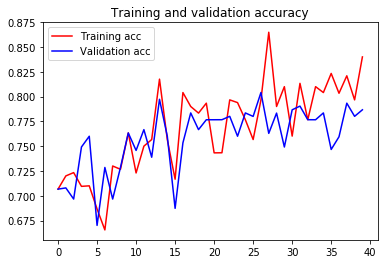

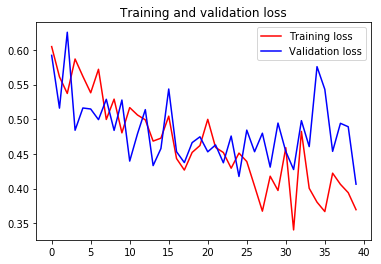

In [300]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b',c='r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b',c='r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<p>We got suprisingly good result even though we did not have that much data for training (no symptoms:734, symptoms: 297). Also we had symptoms image data much more lesser then compared to nosymptoms data.  </p>

<h2>Result</h2>
<h4>Simple predictions</h4>

In [301]:
def setupImage(path):
    img = cv2.imread(path)
    img=cv2.resize(img,(img_size,img_size),3)
    img = np.expand_dims(img, axis=0)
    return img

In [302]:
def predictSymptoms(path):
    img = cv2.imread(path)
    img=cv2.resize(img,(img_size,img_size),3)
    img = np.expand_dims(img, axis=0)
    #print(img.shape)
    return model.predict(img)[0][0]

In [303]:
def predictSymptoms2(path):
    test_image = image.load_img(path,target_size = (img_size,img_size))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    #print(img.shape)
    return model.predict(img)

In [304]:
#'./dataset2/train/symptoms/12990_right.jpeg'
print(predictSymptoms('./dataset2/test/nosymptoms/159_left.jpeg'))

0.0


In [305]:
print(predictSymptoms('./dataset2/test/symptoms/1050_right.jpeg'))

1.0


<p>We run on image with symptoms and one without symptoms. Our network predicted correct out come! but this does not prove anything yet. So let's create Confusion Matrix</p>

<h4>Confusion Matrix</h4>

<p>In our test/symptoms folder we have 149 pictures of the eyes which has symptoms and in test/nosymptoms we have 367 pictures.</p>

<h5>Lets predict list of symptoms</h5>

In [306]:
images = []
result = []
#we get all the images to list and create list of ons '1' = 'true' or '0' = 'false'
for img2 in os.listdir('./dataset2/test/symptoms/'):
    p = './dataset2/test/symptoms/'+img2
    images.append(setupImage(p))
    result.append(1)
# stack up images list to pass for prediction
images = np.vstack(images)
#classes is same as predictions
classes = model.predict_classes(images, batch_size=10)
print(classes.T)

[[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0]]


<h5>Lets predict list of nosymptoms</h5>

In [307]:
images = []
result2 = [] 

#we get all the images to list and create list of ons '1' = 'true' or '0' = 'false'
for img2 in os.listdir('./dataset2/test/nosymptoms/'):
    p = './dataset2/test/nosymptoms/'+img2
    images.append(setupImage(p))
    result2.append(0)
# stack up images list to pass for prediction
images = np.vstack(images)
#classes is same as predictions
classes2 = model.predict_classes(images, batch_size=10)
print(classes2.T)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
  0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
  0 0 0 0 0 0 0]]


In [312]:

print('Confusion Matrix (symptoms)')
cm = confusion_matrix(result,classes)
print(cm)
print('Classification Report')
print(classification_report(result,classes))

Confusion Matrix (symptoms)
[[  0   0]
 [130  19]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.13      0.23       149

   micro avg       0.13      0.13      0.13       149
   macro avg       0.50      0.06      0.11       149
weighted avg       1.00      0.13      0.23       149



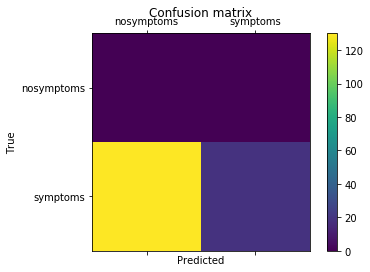

In [313]:
labels = ['nosymptoms', 'symptoms']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [314]:
print('Confusion Matrix (no symptoms)')
cm2 = confusion_matrix(result2,classes2)
print(cm2)
print('Classification Report')
print(classification_report(result2,classes2))

Confusion Matrix (no symptoms)
[[348  19]
 [  0   0]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       367
           1       0.00      0.00      0.00         0

   micro avg       0.95      0.95      0.95       367
   macro avg       0.50      0.47      0.49       367
weighted avg       1.00      0.95      0.97       367



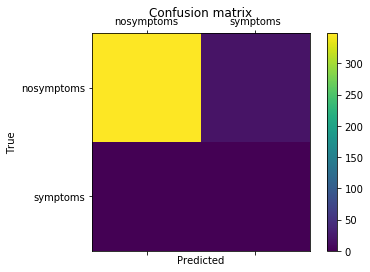

In [315]:
labels = ['nosymptoms', 'symptoms']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm2)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


<p>Okey now we can see from confusion matrix that the results are not that good. Our network is more willing to predict 'no symptom's then predict 'symptoms'. Thats why our accuracy is so high because most of the data is about 'no symptoms' (test: 367, train:734 ) so I dont blame our model for predicting 'no symptoms'. </p>

<h3>Conclusion</h3>
<p>Due to our lack of data we did not get ideal model also some of the images (data) was quite bad and unclear. Perhaps if we would manipulate the images so that the symptoms would be highlighted more it would make better predictions. </p>